In [2]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df=sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
encoder=LabelEncoder()
df['species']=encoder.fit_transform(df['species'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df=df[['sepal_length','petal_length','species']]

In [10]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [12]:
x=df.iloc[:,0:2]
y=df.iloc[:,2]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
# here we use softmax-multinomial so we use class as multinomial
clf=LogisticRegression(multi_class="multinomial")

In [16]:
clf.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [18]:
y_pred=clf.predict(x_test)

In [21]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [22]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [25]:
# prediction
query=np.array([[3.4,2.7]])
clf.predict_proba(query)  # tinho classes ka honeka probability batayega

C:\Users\AKSHATA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [26]:
clf.predict(query)

C:\Users\AKSHATA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [29]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 124.9 kB/s eta 0:00:00


C:\Users\AKSHATA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


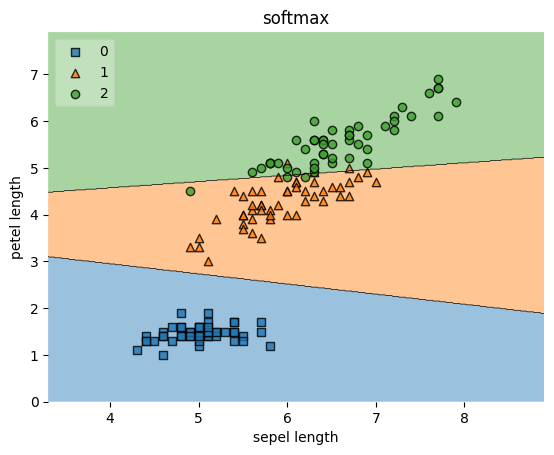

In [30]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.values,y.values,clf,legend=2)
 #adding axes annotations
plt.xlabel("sepel length")
plt.ylabel("petel length")
plt.title("softmax")
plt.show()